In [1]:
import os
from torchvision.datasets.utils import download_url, _extract_zip

dataset_path = os.path.join(".", "blood_smears_dataset")
if not os.path.exists(dataset_path):
    url = "https://data.lhncbc.nlm.nih.gov/public/Malaria/cell_images.zip"
    download_url(url, ".")
    _extract_zip("cell_images.zip", dataset_path, None)
    os.remove("cell_images.zip")

100%|██████████| 353452851/353452851 [00:35<00:00, 10027267.66it/s]


In [8]:
from torchvision.datasets import ImageFolder
import torch

base_dir = os.path.join(dataset_path, "cell_images")
dataset = ImageFolder(base_dir)

In [9]:
import matplotlib.pyplot as plt
import numpy as np

def plot_blood_smears(dataset, parasitized):
    """Plot blood smears."""
    fig, axs = plt.subplots(3, 6, figsize=(16, 8))
    for ax in axs.ravel():
        image, label = dataset[np.random.randint(0, len(dataset))]
        if isinstance(image, torch.Tensor):
            image = image.numpy().transpose(1, 2, 0)
        ax.imshow(image)
        ax.set_title(f"Parasitized ({label})" if label == parasitized
                     else f"Uninfected ({label})")
    plt.tight_layout()
    plt.show()

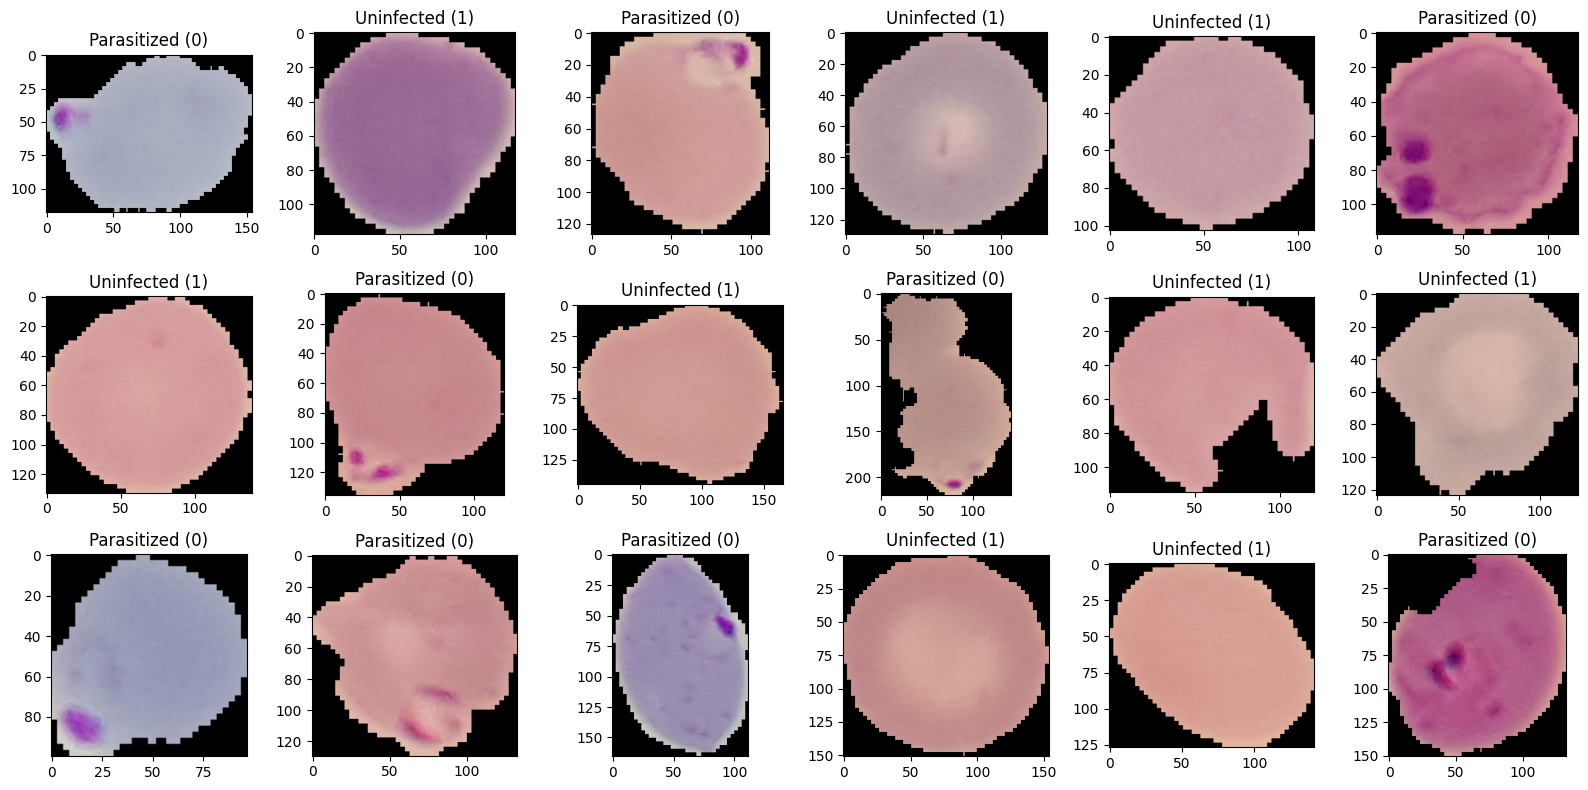

In [10]:
plot_blood_smears(dataset, parasitized=0)

In [12]:
from torchvision.transforms import Compose, Resize, ToTensor 

image_transform = Compose([Resize((28, 28)), ToTensor()])

def label_transform(label):
    """Transform label."""
    return torch.tensor(1 - label).float().unsqueeze(-1)

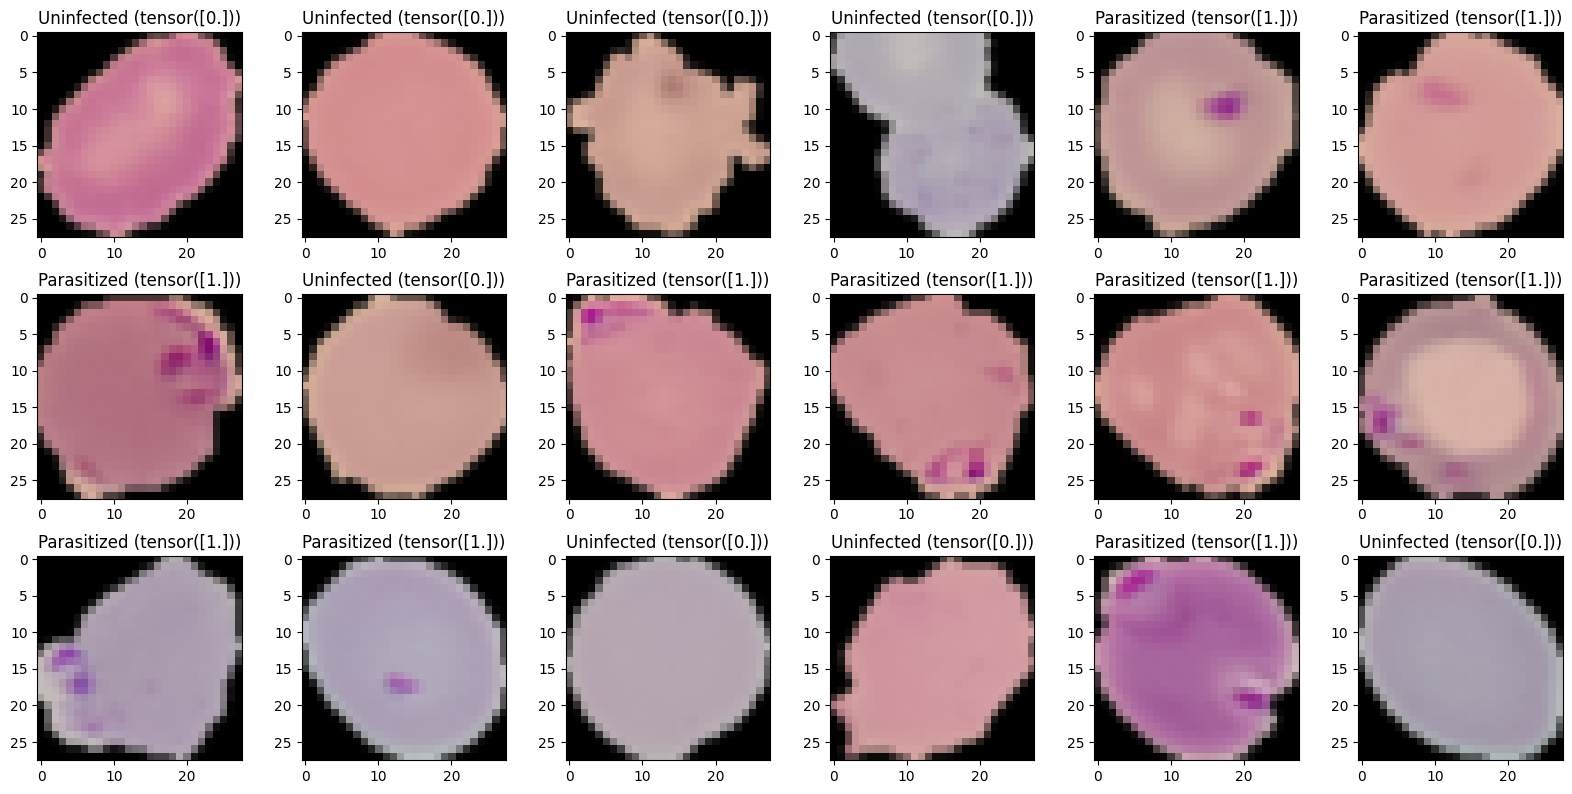

In [16]:
dataset = ImageFolder(base_dir, transform=image_transform, target_transform=label_transform)
plot_blood_smears(dataset, parasitized=1)